## Drugs dataset

This dataset provides information on a variety of medications including their composition, uses, side effects and user reviews. The code I downloaded for this dataset begins by pre-processing the data which I had identified as an important task for this dataset as it included a column of URL links to images which is hard to work with. Then it goes on to perform some other operations on the data such as one-hot encoding as the overall aim of the code is to visualise the correlation between components of the drugs and their side effects. Whilst examining the plots they generated I noted that the way the code split up the string of side effects for each medication was by each word so multi-word side effects were being split into 2 side effects. I decided to adjust this code and then also generate some other plots myself.

Below is the code I downloaded and ran.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer # For One-Hot encoding
from itertools import chain # Used to flatten a list for counting frequencies
import networkx as nx # For visualization

# Read the data 

In [3]:
df = pd.read_csv('Medicine_Details.csv')
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


# Data Preprocessing


In [4]:
# Dropping "Image URL" column.
df = df.drop('Image URL', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Manufacturer        11825 non-null  object
 5   Excellent Review %  11825 non-null  int64 
 6   Average Review %    11825 non-null  int64 
 7   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 739.2+ KB


## Check and Drop Duplicated columns

In [5]:
df[df.duplicated(keep=False)]

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %
779,Aristogyl-F Oral Suspension,Furazolidone (30mg/5ml) + Metronidazole (100mg...,Diarrhea Dysentery,Nausea Headache Dryness in mouth Metallic tast...,Aristo Pharmaceuticals Pvt Ltd,22,28,50
780,Aristogyl-F Oral Suspension,Furazolidone (30mg/5ml) + Metronidazole (100mg...,Diarrhea Dysentery,Nausea Headache Dryness in mouth Metallic tast...,Aristo Pharmaceuticals Pvt Ltd,22,28,50
955,Apexitra 200 Capsule,Itraconazole (200mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,Apex Laboratories Pvt Ltd,83,17,0
956,Apexitra 200 Capsule,Itraconazole (200mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,Apex Laboratories Pvt Ltd,83,17,0
1120,Amyclox-LB-DS Capsule,Amoxycillin (250mg) + Cloxacillin (250mg) + La...,Bacterial infections,Rash Vomiting Allergic reaction Stomach pain N...,Ind Swift Laboratories Ltd,0,0,100
...,...,...,...,...,...,...,...,...
11228,Vomicare Oral Solution,Ondansetron (2mg/5ml),Treatment of Nausea Vomiting,Constipation Diarrhea Fatigue Headache,Suncare Formulations Pvt Ltd,0,0,100
11405,Xrate Cough Expectorant Sugar Free,Ambroxol (15mg/5ml) + Guaifenesin (50mg/5ml) +...,Cough,Nausea Diarrhea Vomiting Dizziness Headache Ra...,Celsius Healthcare Pvt Ltd,67,33,0
11406,Xrate Cough Expectorant Sugar Free,Ambroxol (15mg/5ml) + Guaifenesin (50mg/5ml) +...,Cough,Nausea Diarrhea Vomiting Dizziness Headache Ra...,Celsius Healthcare Pvt Ltd,67,33,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,Minova Life Sciences Pvt Ltd,0,0,100


In [6]:
df = df.drop_duplicates()
df.isna().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [7]:
# Check for inconsistent data types.
df.dtypes

Medicine Name         object
Composition           object
Uses                  object
Side_effects          object
Manufacturer          object
Excellent Review %     int64
Average Review %       int64
Poor Review %          int64
dtype: object

In [17]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11735.000000,11735.000000,11735.000000
mean,38.506263,35.786195,25.707542
std,25.190559,18.265187,23.938754
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


## Clean Side_effect and Component Data



In [8]:
# Drop missing values
df_clean = df[['Composition', 'Side_effects']].dropna()

## Normalized and Tokenized Text Data

I changed this section so when it split the side effects it wasn't just splitting it into singular words as this was splitting some multi-word effects up and causing non-specific words like "and" and "blood" to appear in the most frequent side effects. Instead I noted all individual side effects began with a capital letter in the string so changed the code to ask it to split the string into a list at each capital letter. This improved the visualisations of the data as it was clearer which side effects were more correlated.

In [12]:
# Normalize and split components.
df_clean['Composition_split'] = (
    df_clean['Composition']
    .str.replace(r'[()]', '', regex=True)
    .str.split(r'\+|,')
    .apply(lambda lst: [x.strip().lower() for x in lst])
)

# Normalize and split side effects.
df_clean['Side_effects_split'] = (
    df_clean['Side_effects']
    .str.split(r'(?=[A-Z])')
    .apply(lambda lst: [x.strip().lower() for x in lst if x.strip()])
)

print(df_clean['Side_effects_split'])

0        [rectal bleeding, taste change, headache, nose...
1        [vomiting, nausea, diarrhea, mucocutaneous can...
2                       [nausea, abdominal pain, diarrhea]
3        [nausea, vomiting, diarrhea, upset stomach, st...
4        [headache, diarrhea, gastrointestinal disturba...
                               ...                        
11819    [allergic reaction, application site reactions...
11820    [dizziness, tiredness, decreased potassium lev...
11821    [rash, nausea, paresthesia tingling or prickin...
11822    [flushing sense of warmth in the face ears nec...
11823    [application site reactions burning irritation...
Name: Side_effects_split, Length: 11735, dtype: object


## Extracted Most Frequent Entries

In [13]:
# Get top 20 most common components and side effects.
comp_counts = pd.Series(chain.from_iterable(df_clean['Composition_split'])).value_counts()
side_counts = pd.Series(chain.from_iterable(df_clean['Side_effects_split'])).value_counts()

top_comps = comp_counts.head(20).index
top_sides = side_counts.head(20).index

In [14]:
# Filter each row to keep only top components and side effects
df_clean['Composition_top'] = df_clean['Composition_split'].apply(lambda lst: [x for x in lst if x in top_comps])
df_clean['Side_effects_top'] = df_clean['Side_effects_split'].apply(lambda lst: [x for x in lst if x in top_sides])

## One-Hot Encoding

In [15]:
# One-hot encode filtered lists
mlb_comp = MultiLabelBinarizer()
mlb_side = MultiLabelBinarizer()

comp_encoded = pd.DataFrame(mlb_comp.fit_transform(df_clean['Composition_top']), columns=mlb_comp.classes_)
side_encoded = pd.DataFrame(mlb_side.fit_transform(df_clean['Side_effects_top']), columns=mlb_side.classes_)


In [16]:
# Concatenate both encoded DataFrames to prepare for correlation analysis.
combined = pd.concat([comp_encoded, side_encoded], axis=1)

## Correlation Matrix Calculation

In [17]:
# Compute the correlation matrix between components and side effects.
correlation_matrix = combined.corr().loc[comp_encoded.columns, side_encoded.columns]

In [18]:
# Extract and sort the top 20 most correlated pairs.
top_correlations = correlation_matrix.stack().sort_values(ascending=False).head(20)
top_corr_df = top_correlations.reset_index()
top_corr_df.columns = ['Component', 'Side Effect', 'Correlation']
print(top_corr_df)

              Component                                        Side Effect  \
0       metformin 500mg               hypoglycemia low blood glucose level   
1       glimepiride 2mg               hypoglycemia low blood glucose level   
2       metformin 500mg                                         flatulence   
3       glimepiride 1mg               hypoglycemia low blood glucose level   
4      rabeprazole 20mg                                         flatulence   
5   luliconazole 1% w/w  application site reactions burning irritation ...   
6      domperidone 30mg                                         flatulence   
7      domperidone 30mg                                   dryness in mouth   
8     pioglitazone 15mg               hypoglycemia low blood glucose level   
9    levocetirizine 5mg                                   dryness in mouth   
10     domperidone 30mg                                       stomach pain   
11     metformin 1000mg               hypoglycemia low blood glu

# Visualizing the Corelated Data 

## Heatmap

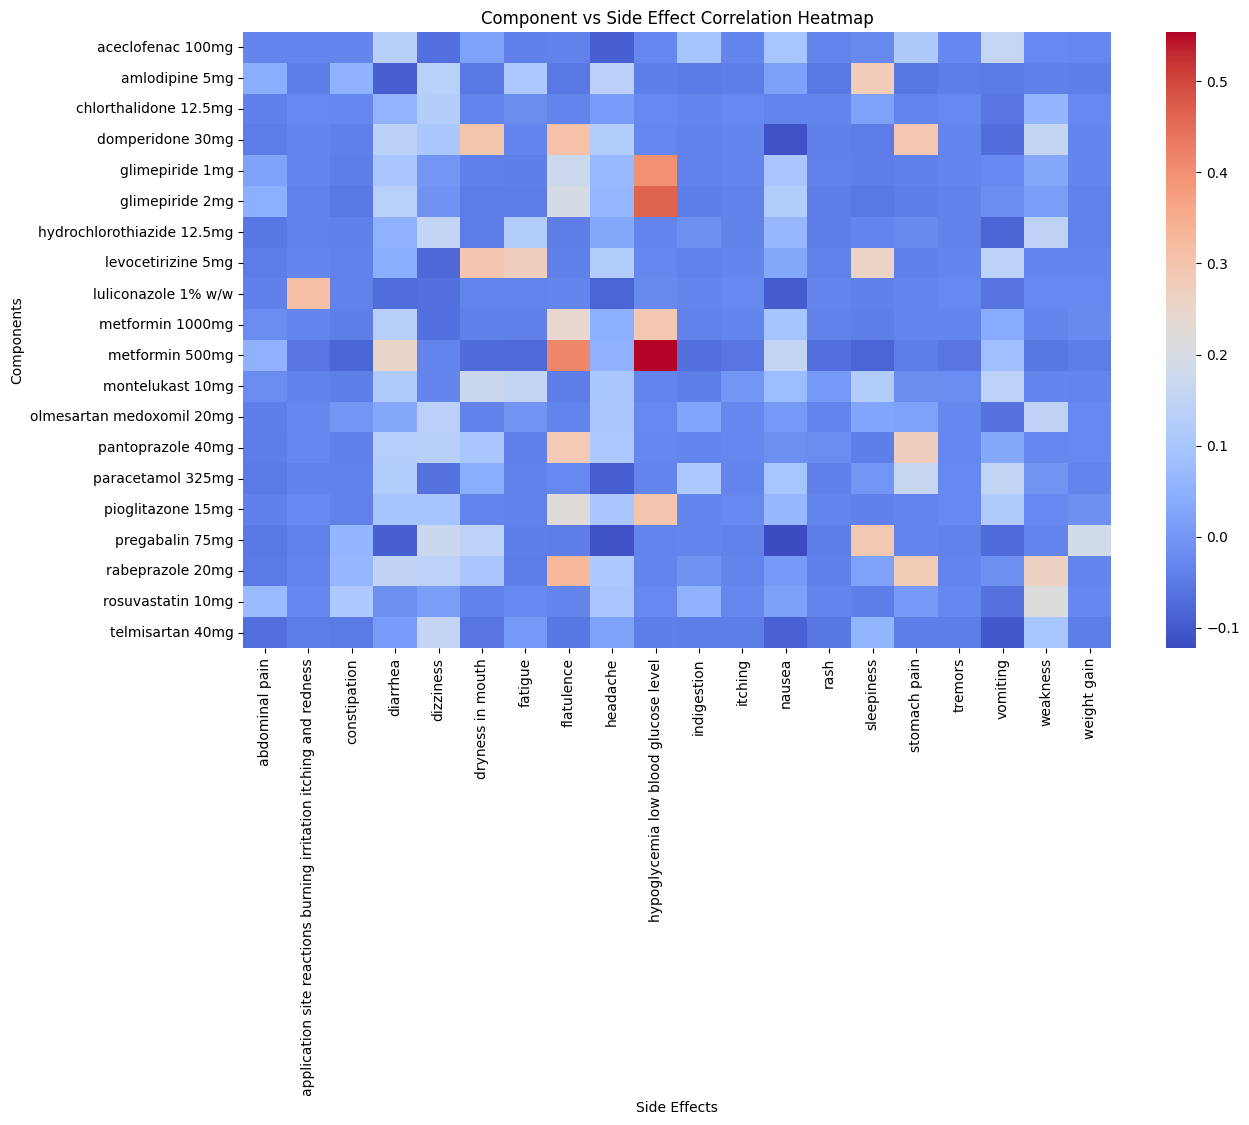

In [19]:
# Visualize the correlation matrix using a heatmap.
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Component vs Side Effect Correlation Heatmap')
plt.xlabel('Side Effects')
plt.ylabel('Components')
plt.show()

## Plot Horizental Bar Chart

C:\Users\nadia\AppData\Local\Temp\ipykernel_23740\2993290505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


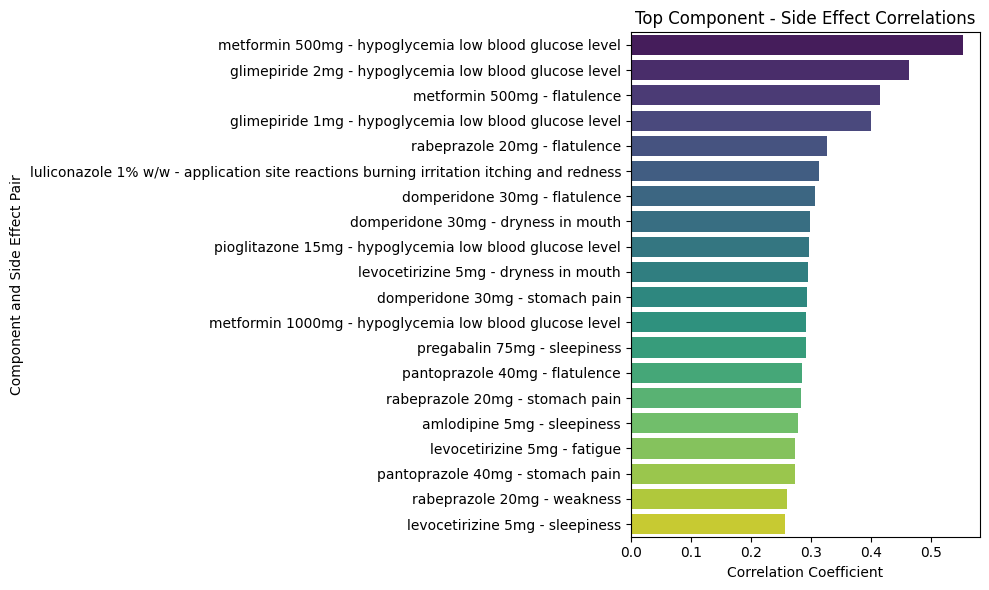

In [20]:
# Prepare plots for Bar Chart
top_corr_df['Pair'] = top_corr_df['Component'] + " - " + top_corr_df['Side Effect']

# Using Plot Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_corr_df.sort_values(by='Correlation', ascending=False),
    x='Correlation', y='Pair',
    palette='viridis'
)
plt.title('Top Component - Side Effect Correlations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Component and Side Effect Pair')
plt.tight_layout()
plt.show()

## Plot Network Graph

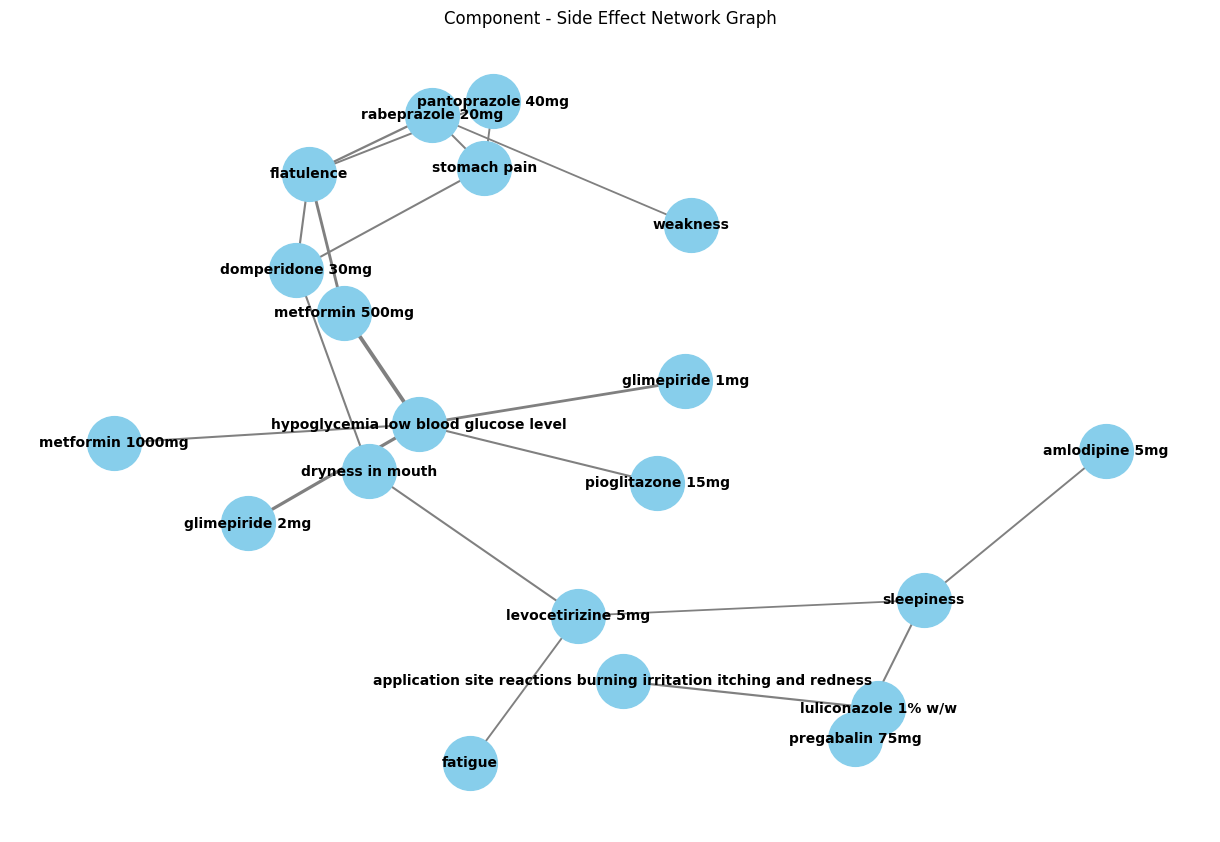

In [21]:
# Using Plot Network Graph
G = nx.Graph()

for _, row in top_corr_df.iterrows():
    G.add_edge(row['Component'], row['Side Effect'], weight=row['Correlation'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
edges = G.edges(data=True)
weights = [d['weight'] * 5 for (_, _, d) in edges]

nx.draw(
    G, pos, with_labels=True,
    node_color='skyblue', edge_color='gray',
    width=weights, node_size=1500,
    font_size=10, font_weight='bold'
)
plt.title('Component - Side Effect Network Graph')
plt.show()

## My own visualisations of the data

Below I have written new code or adapted the code to produce my own visualisations of this correlation data.

## Stacked Bar Chart

C:\Users\nadia\AppData\Local\Temp\ipykernel_23740\3908050089.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


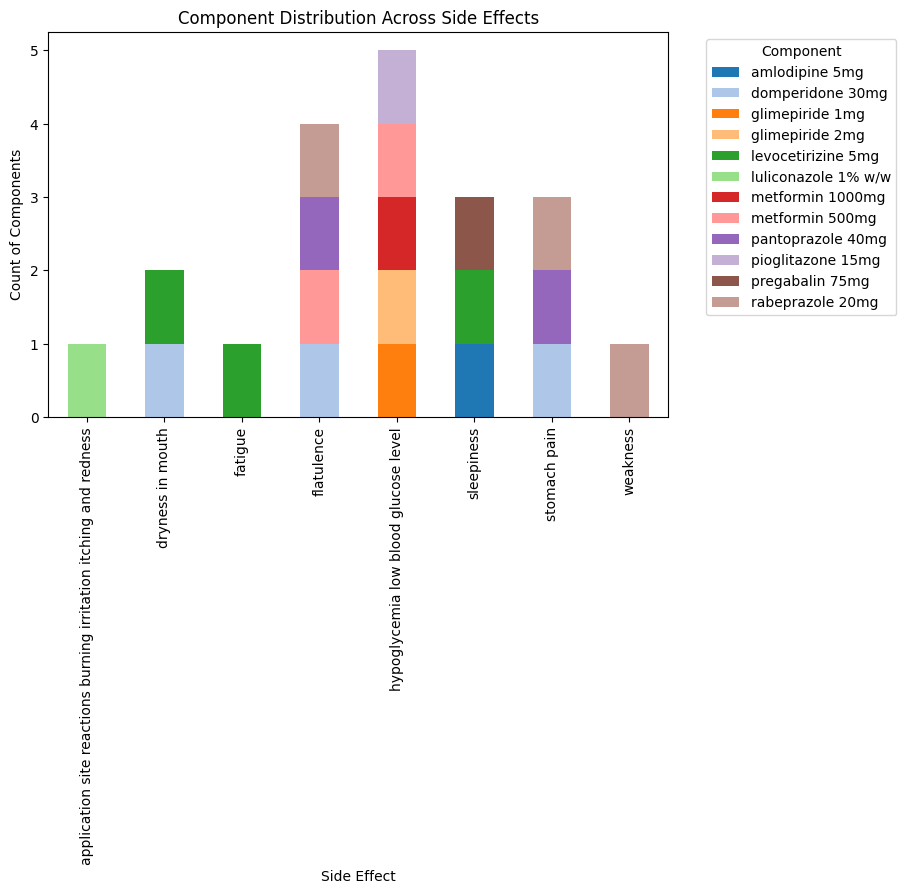

In [40]:
# I continue to use just the top 20 most correlated data pieces


pivot_top_corr_df = (
    top_corr_df.pivot_table(index='Side Effect', columns='Component', aggfunc='size', fill_value=0)
)

# the line below just creates a colour palette with an appropriate number of colours

palette = sns.color_palette("tab20", len(pivot_top_corr_df.columns))

pivot_top_corr_df.plot(kind='bar', stacked=True, figsize=(8, 5), color=palette)

plt.title("Component Distribution Across Side Effects")
plt.xlabel("Side Effect")
plt.ylabel("Count of Components")
plt.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 100% Stacked Bar Chart

C:\Users\nadia\AppData\Local\Temp\ipykernel_23740\1270730698.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


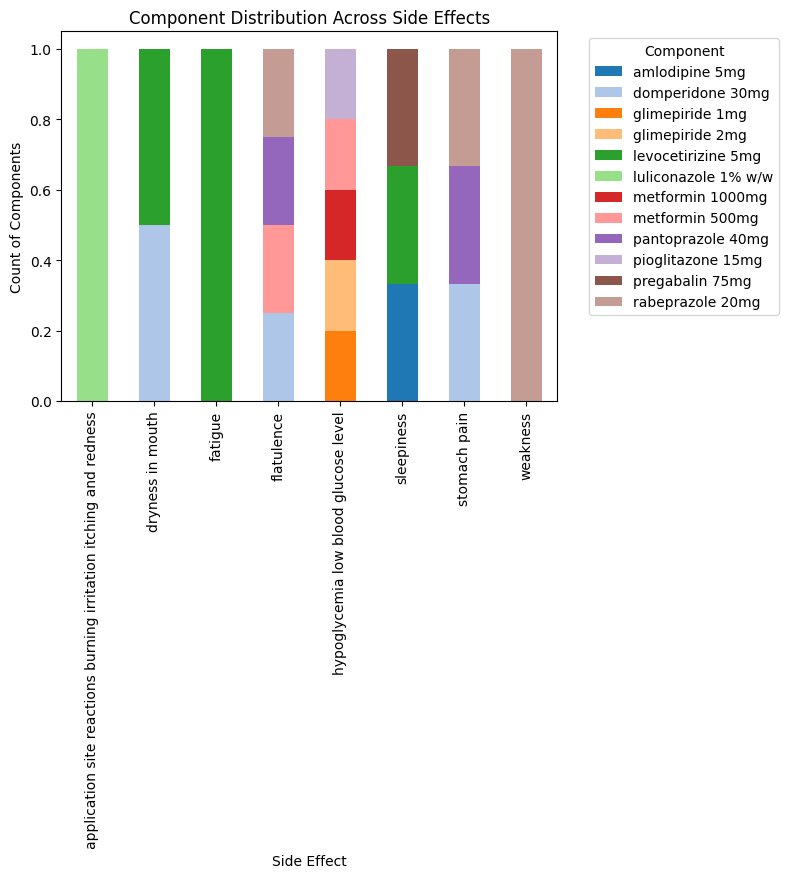

In [41]:
# here is a minor change to the code above to produce a 100% stacked chart instead so the components are more clearly viewed as proportions of the drugs

pivot_top_corr_df.div(pivot_top_corr_df.sum(axis=1), axis=0).plot(kind='bar', stacked=True, color=palette)

plt.title("Component Distribution Across Side Effects")
plt.xlabel("Side Effect")
plt.ylabel("Count of Components")
plt.legend(title="Component", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Box plot

C:\Users\nadia\AppData\Local\Temp\ipykernel_23740\3577414489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


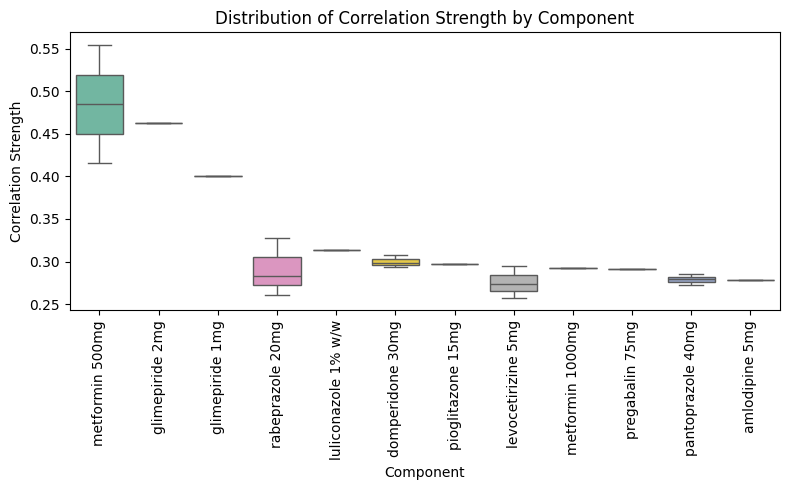

In [ ]:


plt.figure(figsize=(8, 5))
sns.boxplot(
    data=top_corr_df,
    x='Component',
    y='Correlation',
    palette='Set2'
)

plt.title("Distribution of Correlation Strength by Component")
plt.xlabel("Component")
plt.ylabel("Correlation Strength")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Scatter Plot

Here I decided to try to work with a different question for the data - is there a correlation between the number of components in the drugs and the number of side effects.

C:\Users\nadia\AppData\Local\Temp\ipykernel_23740\2293594571.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


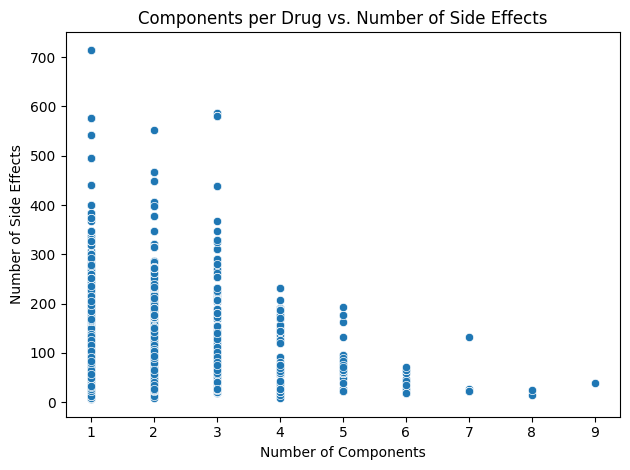

In [50]:
df_clean['Num_Components'] = df_clean['Composition_split'].apply(len)
df_clean['Num_Side_Effects'] = df_clean['Side_effects'].apply(len)

sns.scatterplot(
    data=df_clean,
    x='Num_Components',
    y='Num_Side_Effects',
    palette='viridis'
)
plt.title('Components per Drug vs. Number of Side Effects')
plt.xlabel('Number of Components')
plt.ylabel('Number of Side Effects')
plt.tight_layout()
plt.show()

Here I attempted to add a regression line to see a clearer trend. But as you can see in the plot it doesn't add lots of information. This may not have been the best choice of plot for the data but it was worth a try to see if it showed anything.

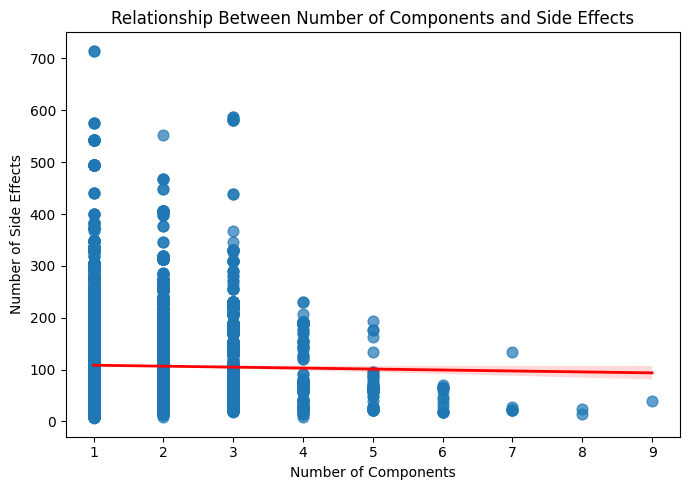

In [ ]:
plt.figure(figsize=(7,5))

sns.regplot(
    data=df_clean,
    x='Num_Components',
    y='Num_Side_Effects',
    scatter_kws={'alpha':0.7, 's':60},   # transparency & point size
    line_kws={'color':'red', 'lw':2},    # style for trend line
    ci=95,                               # show confidence interval 
)

plt.title('Relationship Between Number of Components and Side Effects')
plt.xlabel('Number of Components')
plt.ylabel('Number of Side Effects')
plt.tight_layout()
plt.show()